<a href="https://colab.research.google.com/github/Elberth-Git/marketing_investimento/blob/main/Nova_vers%C3%A3o_Classificacao_Marketing_Investimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação: Marketing em Investimentos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

#dados do GitHub
url = "https://raw.githubusercontent.com/Elberth-Git/marketing_investimento/main/marketing_investimento%20-%20marketing_investimento.csv.csv"
dados = pd.read_csv(url)
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [2]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [47]:
import plotly.express as px

In [48]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [49]:
px.histogram(dados, x = 'estado_civil', text_auto = True)

In [50]:
px.histogram(dados, x = 'inadimplencia', text_auto = True)

In [51]:
px.histogram(dados, x = 'escolaridade', text_auto = True)

In [52]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True)

In [53]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

In [54]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [55]:
px.histogram(dados, x = 'escolaridade', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [56]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

In [57]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

### Variáveis numéricas

In [58]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

In [59]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

In [60]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

In [61]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [37]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

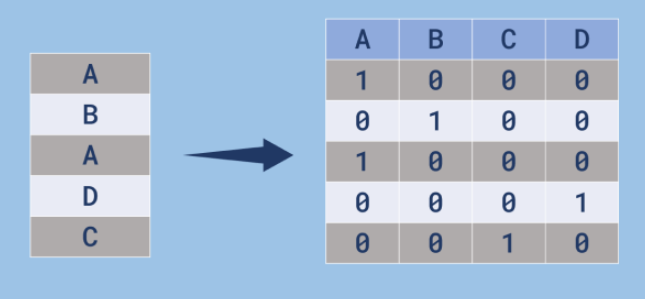

In [116]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [117]:
one_hot = OneHotEncoder(drop = 'if_binary') #cria objeto que irá comverter para 0 e 1
transformer = make_column_transformer((one_hot, ['estado_civil',
                                                'escolaridade',
                                                'inadimplencia',
                                                'fez_emprestimo']),
                                      remainder='passthrough',
                                      sparse_threshold=0) # Cria modelo para transformar as colunas

linhas = transformer.fit_transform(x)
colunas = transformer.get_feature_names_out()
x_onehot = pd.DataFrame(linhas, columns = colunas)   #Features x modificados

In [118]:
x_onehot.head()

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0


In [119]:
#Demostração passo a passo do que está ocorrendo

#Passo 1
#linhas = trasformer.fit_transform(x)

#Passo 2
#trasformer.feature_names_in_

#Passo 3
#colunas = trasformer.get_feature_names_out()

#passo 4
#x = pd.DataFrame(linhas, columns = colunas)

## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [120]:
from sklearn.preprocessing import LabelEncoder

In [121]:
#duas formas de fazer a mesma coisa
#label = LabelEncoder()
#y = label.fit_transform(y)

y = LabelEncoder().fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [122]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [123]:
#Vira dataframe outra vez
y = pd.DataFrame(y, columns = ['aderencia_inverstimento'])

In [124]:
y.head()

,aderencia_inverstimento
0,1
1,1
2,0
3,1
4,1


# Ajustando modelos

## Dividindo os dados entre treino e teste

Para compreender se o modelo está de fato aprendendo com os dados, precisamos fazer uma separação dos dados entre treinamento e teste. Os dados de **treinamento** são usados para ajustar o modelo, enquanto os dados de **teste** servem para verificar o aprendizado do modelo em dados que não foram utilizados no momento do ajuste.

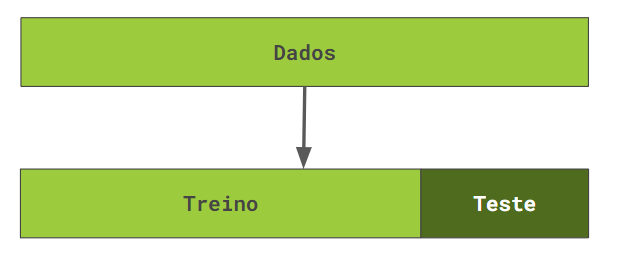

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
import numpy as np
SEED = 123
np.random.seed(SEED)

x_onehot_train, x_onehot_test, train_y, test_y = train_test_split(x_onehot, y, test_size = 0.2, random_state = SEED)

## Modelo de base

O modelo mais simples de classificar os dados é simplesmente utilizar um algoritmo que chuta todas as classificações para a classe que tem maior frequência. Esse algoritmo serve como um critério de comparação, para identificar se os outros modelos tem um desempenho melhor do que a classificação mais simples possível.

In [127]:
#importando bibliotecas
from sklearn.dummy import DummyClassifier

In [128]:
dummy_stratifield = DummyClassifier() #Cria modelo
dummy_stratifield.fit(x_onehot_train, train_y) #Treina modelo
dummy_stratifield.score(x_onehot_test, test_y) #Avalia modelo

acuracia_dummy = dummy_stratifield.score(x_onehot_test, test_y) * 100
print(f'A Acurácia do modelo dummy stratifield foi de {acuracia_dummy:.2f} %')

A Acurácia do modelo dummy stratifield foi de 62.60 %


## Árvore de decisão

O modelo de árvore de decisão é muito utilizado pela sua alta **explicabilidade** e **processamento rápido**, mantendo um desempenho bem interessante.

Ele se baseia em decisões simples tomadas pelo algoritmo, separando os dados com base em comparações de **menor** e **maior** nos valores das colunas da base de dados.

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
dtc = DecisionTreeClassifier(random_state=SEED, max_depth=3)  # Cria uma instância do modelo de árvore de decisão

# Treinando o modelo com os dados de treinamento
dtc.fit(x_onehot_train, train_y) # Treina o dtco usando os dados de treinamento (x_onehot_train, train_y)

# Fazendo previsões para o conjunto de teste
result = dtc.predict(x_onehot_test)  # Utiliza o dtco treinado para fazer previsões para o conjunto de teste (x_onehot_test)

dtc_previsoes = dtc.predict(x_onehot_train)

acuracia_dtc_score = dtc.score(x_onehot_test, test_y) * 100

print(f'Acurácia do dtco: {acuracia_dtc_score:.2f} %' )

Acurácia do dtco: 70.08 %


In [131]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

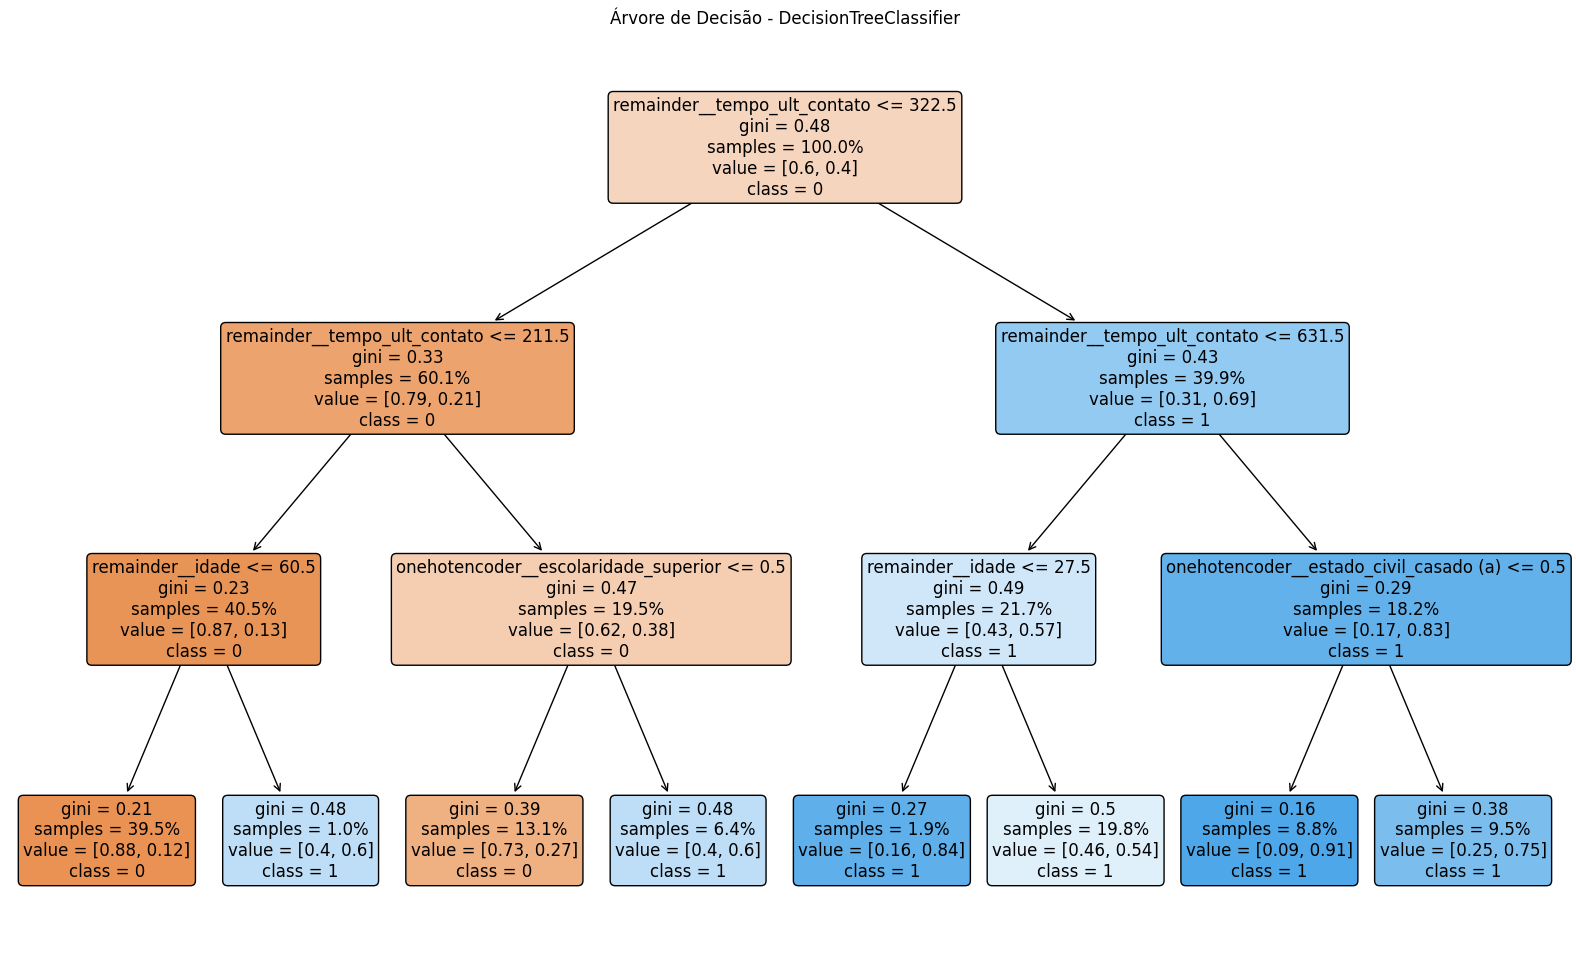

In [132]:
# Plotando a árvore de decisão
plt.figure(figsize=(20, 12))  # Define o tamanho da figura
plot_tree(dtc, filled=True,
          feature_names=x_onehot_train.columns,
          class_names=["0", "1"],
          rounded=True,
          precision=2,
          impurity=True,
          proportion=True,
          fontsize=12,  # Fonte um pouco maior para facilitar a leitura
          max_depth=3  # Limita a profundidade a 3 níveis (ajustável conforme necessário)

)

plt.title("Árvore de Decisão - DecisionTreeClassifier")
plt.show()

```
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']
```

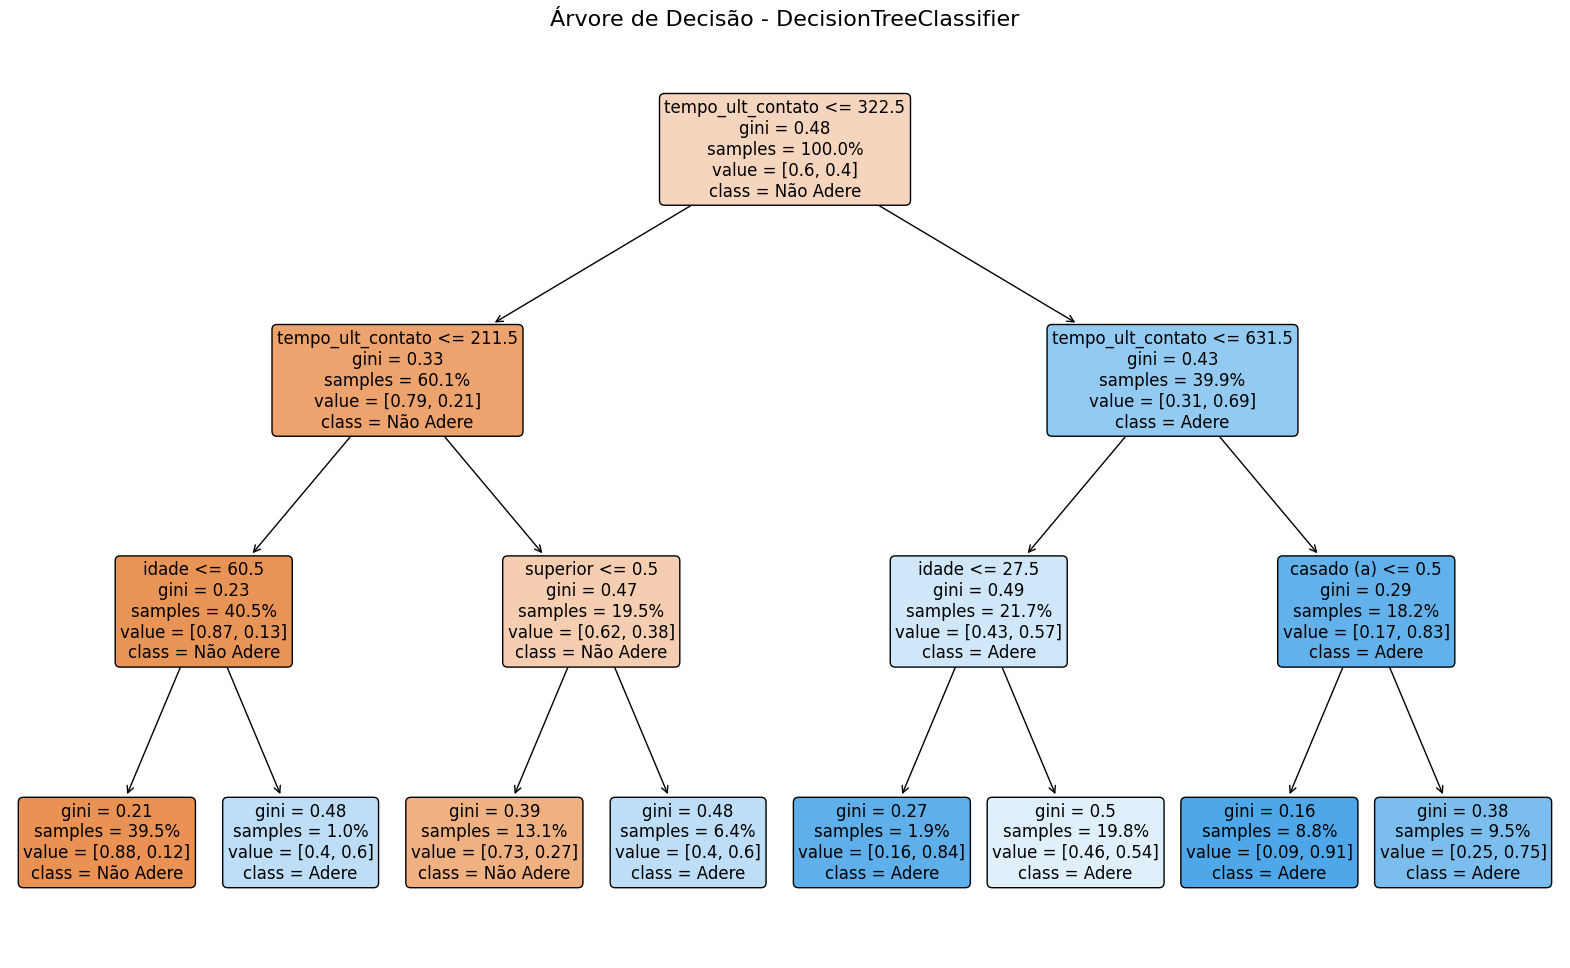

In [133]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

# Ajuste do tamanho da figura para uma visualização mais próxima
plt.figure(figsize=(20, 12))

# Plotando a árvore de decisão com nomes de colunas mais legíveis
plot_tree(
    dtc,
    filled=True,
    feature_names=nome_colunas,  # Usando a lista de nomes de colunas fornecida
    class_names=["Não Adere", "Adere"],  # Classes de saída
    rounded=True,
    precision=2,
    impurity=True,
    proportion=True,
    fontsize=12,
    max_depth=3  # Você pode ajustar a profundidade conforme necessário
)

plt.title("Árvore de Decisão - DecisionTreeClassifier", fontsize=16)
plt.show()

# Seleção de modelos

## Normalizando os dados

Alguns algoritmos podem atribuir um peso maior aos valores das variáveis devido a escala dos valores e não pela importância da classificação da variável alvo. Por exemplo, em uma base de dados com a colunas **idade** e **salário**, o algoritmo pode dar um peso de decisão maior para os valores do salário simplesmente por estar em uma escala maior do que os valores de idade, e não porque a variável salário é mais importante do que a variável idade.

Nesses casos, precisamos fazer uma transformação nos dados para que fiquem em uma mesma escala, fazendo com que o algoritmo não seja influenciado incorretamente pelos valores numéricos divergentes entre as variáveis.

$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}} $

In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
from sklearn.metrics import accuracy_score
# Definir a semente para a reprodutibilidade

#normalização antes de dividir treino e teste
x_raw = MinMaxScaler().fit_transform(x_onehot) #criando um modelo de machine learnin que normaliza dados com base no x

#Normalização depois de dividir os dados de treino e teste
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_onehot_train) #apenas para primeira fit
x_teste_normalizado = normalizacao.transform(x_onehot_test) #Trasnform para as demais

## KNN

O algoritmo KNN se baseia no cálculo de distância entre os registros da base de dados e busca elementos que estejam próximos uns dos outros (vizinhos) para tomar a decisão da classificação.

Por conta de usar cálculos de distância, esse algoritmo é influenciado pela escala das variáveis e por conta disso é necessário uma transformação nos dados antes de utilizar esse método.

In [136]:
from sklearn.neighbors import KNeighborsClassifier

In [137]:
#importando Bibliotecas
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# k = igual aonúmero de vizinhos

#Normalizar dados (dados Númericos) - pre-processamento
norm = StandardScaler()
X_normalizado = norm.fit_transform(x_onehot)

#Separar dados de treino e teste
SEED = 123

X_train, X_test, y_train, y_test = train_test_split(X_normalizado, y, test_size = 0.25, random_state = SEED, stratify=y)
#Stratify é responsavel para realizar o balanceamento dos dados de treino e teste direcionado a questão da proporção dos dados

#Criar(istanciar) o modelo
knn = KNeighborsClassifier(metric='euclidean') # k = 5 por padrão

#Treinar o modelo
knn.fit(X_train, y_train)

#Testar (Avaliar) o modelo
previsoes_knn = knn.predict(X_test)
acuracia_knn = accuracy_score(y_test, previsoes_knn) * 100
print(f'Acurácia do KNeighborsClassifier: {acuracia_knn:.2f}%')

# Avaliar o modelo no conjunto de teste
acuracia_knn_score = knn.score(X_test, y_test) * 100
print(f'Acurácia do KNeighborsClassifier: {acuracia_knn_score:.2f}%')

Acurácia do KNeighborsClassifier: 73.82%
Acurácia do KNeighborsClassifier: 73.82%


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



## Escolhendo e salvando o melhor modelo

Ao final de um projeto de machine learning, devemos comparar os resultados dos modelos e escolher aquele que tenha o melhor desempenho.


In [138]:
# Escolhendo melhorr modelo de ML

print(f'Acurácia do modelo dummy stratifield foi: {acuracia_dummy:.2f} %')
print(f'Acurácia do decicion tree classifier foi: {acuracia_dtc_score:.2f} %' )
print(f'Acurácia do KNeighborsClassifier: {acuracia_knn_score:.2f}%')

Acurácia do modelo dummy stratifield foi: 62.60 %
Acurácia do decicion tree classifier foi: 70.08 %
Acurácia do KNeighborsClassifier: 73.82%


In [139]:
#Modelo escolhido:

print(f'O modelo escolhido foi KNeighborsClassifier: {acuracia_knn_score:.2f}% ')

O modelo escolhido foi KNeighborsClassifier: 73.82% 


## Pickle Dump


Podemos armazenar o modelo em um arquivo serializado do tipo pickle para que seja utilizado em produção, ou seja, em dados do mundo real para atender as necessidades do problema que precisa ser resolvido.

## Salvar modelo treinado

In [140]:
import pickle

In [141]:
#exportar modelo arvore de decisão

In [142]:
with open('modelo_knn.pkl' , 'wb') as arquivo:
    pickle.dump(knn, arquivo)

In [143]:
#explorar o modelo one hot code

In [144]:
with open('modelo_onehotenc.pkl' , 'wb') as arquivo:
    pickle.dump(trasformer, arquivo)

## Usando modelo

In [145]:
modelo_knn = pd.read_pickle('modelo_knn.pkl')
modelo_one_hot = pd.read_pickle('modelo_onehotenc.pkl')

In [154]:
novo_cliente ={
    'idade': [40],
    'estado_civil': ['solteiro (a)'],
    'escolaridade': ['superior'],
    'inadimplencia': ['sim'],
    'fez_emprestimo': ['nao'],
    'saldo': [2500],
    'numero_contatos': [1],
    'tempo_ult_contato': [0]
}


In [155]:
novo_cliente = pd.DataFrame(novo_cliente)
novo_cliente

,idade,estado_civil,escolaridade,inadimplencia,fez_emprestimo,saldo,numero_contatos,tempo_ult_contato
0,40,solteiro (a),superior,sim,nao,2500,1,0


In [156]:
novo_cliente = transformer.transform(novo_cliente)
modelo_knn.predict(novo_cliente)

array([0])